# ANÁLISIS DE ENCUESTAS DE EMPLEADOS

## Introducción

Vamos a analizar una serie de encuestas que fueron realizadas a los empleados que terminaban su relación laboral en el Department of Education, Training and Employment (DETE) y el Technical and Further Education (TAFE) institute en Queensland, Australia.

Tomaremos el rol de analista de datos, y queremos determinar una serie de cuestiones:

- ¿Tuvieron los empleados que estuvieron trabajando durante periodos cortos alguna insatisfacción que les llevase a abandonar el empleo? ¿Y los más antiguos?
- ¿Los empleados más jóvenes resignaron por alguna insatisfacción? ¿Y los más mayores?

Combinaremos encuestas de ambas entidades para responder estas preguntas.

## 1. Configuración del entorno de trabajo

Primeramente, vamos a realizar las importaciones necesarias para trabajar con las distintas librerías que utilizaremos.

Usaremos pandas y NumPy para manipular y visualizar dataframes, y matplotlib para visualizar gráficos.
Además, evitaremos un copyWarning de pandas con una línea de código y centraremos los outputs para una mejor visualización:

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pandas mostrará todas las columnas si lo deseamos
pd.set_option('display.max_columns', None)

# Evitamos el copyWarning de pandas
pd.options.mode.chained_assignment = None 

# Mostramos gráficos de matplotlib inline
%matplotlib inline

# Centramos los outputs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}
}
</style>
""")

## 2. Los datasets

Utilizaremos dos datasets públicos que contienen los datos relativos a las encuestas y los datos de los empleados.

### 2.1. Enlaces de descarga de los datasets

Estos datasets se descargaron de la página oficial del Gobierno Australiano; los enlaces son los siguientes:

https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey


### 2.2.  Lectura y descripción general de los datos

Vamos a leer los datasets con pandas, y los guardaremos en dos variables:

In [2]:
dete_survey = pd.read_csv('dete.csv')
tafe_survey = pd.read_csv('tafe.csv')

**Vamos a visualizar algunas columnas de ambos dataframes**

In [3]:
# Primeras columnas de 'dete_survey'
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# Primeras columnas de 'tafe_survey'
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. ����Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induct

**Mostramos ahora información relativa a ambos dataframes**

In [5]:
# Vamos a mostrar la información general de 'dete_survey'
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [6]:
# Vamos a mostrar la información general de 'tafe_survey'
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

**Comprobamos si existen valores nulos**

In [7]:
# Comprobamos cuántos valores nulos existen en 'dete_survey'
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
# Comprobamos cuántos valores nulos existen en 'tafe_survey'
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. ����Current Age                                                  106
Employment Type. ����Employment Type                                         106
Classification. ����Classification                                           106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

**La información que nos muestran los dataframes es la siguiente:**

- **dete_survey**
    - Consta de 822 filas y 56 columnas
    - Las columnas *'Aboriginal', 'Torres Strait', 'South Sea', 'Disability' y 'NESB'* tienen entre 790 y 819 valores nulos. Habrá que decidir qué hacer con estos datos que faltan.
    - Algunos valores vienen por defecto como *Not Stated*. En realidad son valores nulos.

- **tafe_survey**
    - Consta de 702 filas y 72 columnas
    - Muchas de las columnas son las mismas que en 'dete_survey', pero con otro nombre                               

## 3. Data Cleaning

Vamos a empezar a acondicionar los dataframes para poder trabajar con ellos.

De momento, vamos a leer de nuevo 'dete_survey' para que los valores *Not Stated* sean nulos, y eliminaremos columnas de ambos dataframes que no nos sirven para nuestro análisis.

### 3.1. Valores nulos en 'dete_survey'

Hemos visto que el dataframe 'dete_survey' tiene ciertos valores que en vez de ser nulos, aparecen como *Not Stated*. Vamos a leer de nuevo el dataset con pandas y trataremos estos valores como nulos:

In [9]:
# Leemos de nuevo el archivo dete.csv , pero esta vez indicando los valores que son nulos
dete_survey = pd.read_csv('dete.csv', na_values='Not Stated')

### 3.2. Eliminación de columnas innecesarias

Hay varias columnas en ambos dataframes que no nos sirven para nuestros objetivos.

Como explicamos en la Introducción, lo que queremos determinar es:

- *¿Tuvieron los empleados que estuvieron trabajando durante periodos cortos alguna insatisfacción que les llevase a abandonar el empleo? ¿Y los más antiguos?*
- *¿Los empleados más jóvenes resignaron por alguna insatisfacción? ¿Y los más mayores?*

Por tanto, nos servirán las columnas con la siguiente información:

- Información relativa al periodo trabajado
- Información relativa a la edad del trabajador
- Información relativa a las insatisfacciones del trabajador

Si echamos un vistazo a las columnas de los dataframes, podemos ver que la estructura en ambos casos es la siguiente:

- **Primeras columnas:** Info del trabajador, fechas, motivos del cese.
- **Columnas centrales:** Encuesta sobre el trabajo en general
- **Últimas columnas:** Género, edad. En el caso de 'tafe_survey', duración del Servicio

Por lo tanto, y entrando más en detalle en las columnas concretas, **eliminaremos las columnas centrales, al no tener relevancia para nuestro análisis**.

**En el dataframe 'dete_survey' eliminaremos desde la columna 28 hasta la 48, ambas incluidas.**

**En el dataframe 'tafe_survey' eliminaremos desde la columna 17 hasta la 65, ambas incluidas**

In [10]:
# Creamos los nuevos dataframes, eliminando las columnas que no nos interesan:

# dete_survey_updated
dete_survey.drop(columns=dete_survey.columns[28:49], axis=1, inplace=True)

# tafe_survey_updated
tafe_survey.drop(columns=tafe_survey.columns[17:66], axis=1, inplace=True)

**Visualizamos los nuevos dataframes actualizados para comprobar que hemos eliminado las columnas deseadas:**

In [11]:
# dete_survey_updated: nuevas columnas
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [12]:
# tafe_survey_updated: nuevas columnas
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    int64  
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

### 3.3. Estandarización de columnas

Ahora que tenemos los dos dataframes con las columnas que nos interesan, vamos a identificar las columnas comunes entre ambos.

Concretamente, podemos ver que las siguientes columnas ofrecen la misma información, pero tienen nombres distintos:

In [13]:
# Creamos un pequeño dataframe para mostrar las columnas coincidentes

d = {'dete_survey': ['ID', 'SeparationType', 'Cease Date', 'Age', 'Gender'], 
     'tafe_survey': ['Record ID', 'Reason for ceasing employment', 'CESSATION YEAR', 
                     'CurrentAge.CurrentAge', 'Gender.What is your Gender?'],
     'Definición': ['ID del trabajador', 'Razón del cese', 'Fecha del cese', 
                    'Edad del trabajador', 'Género del trabajador']}

df = pd.DataFrame(data=d)

# En notebook, el código para no mostrar los índices es el siguiente
df.style.hide_index()

dete_survey,tafe_survey,Definición
ID,Record ID,ID del trabajador
SeparationType,Reason for ceasing employment,Razón del cese
Cease Date,CESSATION YEAR,Fecha del cese
Age,CurrentAge.CurrentAge,Edad del trabajador
Gender,Gender.What is your Gender?,Género del trabajador


**Antes de igualar los nombres de las columnas en ambos dataframes, vamos a modificar los nombres de todas las columnas en 'dete_survey_updated', de acuerdo a los siguientes criterios:**

- Todas las letras serán minúsculas
- Eliminaremos los espacios en blanco con str.strip()
- Los espacios entre palabras, los reemplazaremos por una barra baja "_"

In [14]:
# Pandas nos permite encadenar todos los métodos que necesitamos
columns = dete_survey.columns.str.replace(" ","_").str.lower().str.strip()
dete_survey.columns = columns

In [15]:
# Comprobamos el nuevo estado de las columnas
dete_survey.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

**Ahora que tenemos las columnas estandarizadas en 'dete_survey', vamos a renombrar las columnas comunes a ambos dataframes en 'tafe_survey' :**

In [16]:
# Las columnas del TAFE que vamos a renombrar son las siguientes:
new_cols = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. ����What is your Gender?': 'gender',
    'CurrentAge. ����Current Age': 'age',
    'Employment Type. ����Employment Type': 'employment_status',
    'Classification. ����Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

In [17]:
# Realizamos la conversión
tafe_survey.rename(new_cols, inplace=True, axis=1)

In [18]:
# Comprobamos el nuevo estado de las columnas
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

**Las columnas de 'tafe_survey' no las vamos a estandarizar de la misma manera que las de 'dete_survey', porque podría ser más tedioso encontrar alguna columna que necesitemos en un futuro.**

Por ejemplo, la columna *Contributing Factors. Dissatisfaction*, se lee de manera más clara así que de esta manera: *contributing_factors_dissatisfaction*.

La estandarización que realizaremos será básica:

- Todas las letras serán minúsculas para igualar los nombres a los de las nuevas columnas
- Eliminaremos los espacios en blanco al principio y al final

In [19]:
# Encadenamos métodos, de la misma manera que antes
tafe_survey.columns = tafe_survey.columns.str.strip().str.lower()

In [20]:
# Comprobamos el estado de las columnas tras la estandarización
tafe_survey.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing factors. career move - public sector',
       'contributing factors. career move - private sector',
       'contributing factors. career move - self-employment',
       'contributing factors. ill health',
       'contributing factors. maternity/family',
       'contributing factors. dissatisfaction',
       'contributing factors. job dissatisfaction',
       'contributing factors. interpersonal conflict',
       'contributing factors. study', 'contributing factors. travel',
       'contributing factors. other', 'contributing factors. none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### 3.4. Filtro por bajas voluntarias

Todavía quedan datos en los dataframes que no son relevantes para determinar nuestros objetivos: conocer las insatisfacciones de los empleados que causaron baja. Vamos a explorar los dataframes en busca de datos que no nos interesen para hacer aún más ligera la cantidad de datos que debemos manejar.

Es lógico pensar que no todos los trabajadores renunciaron al empleo, sino que habrá distintos motivos de cese que no están relacionados con una baja voluntaria por parte del trabajador a raíz de una insatisfacción (cese por fuerza mayor, jubilación, etc.). En este caso, solo nos interesarían los datos de los trabajadores que causaron baja voluntaria, porque las bajas por otras causas no son parte de nuestro análisis.

**Vamos a recurrir a las columnas que contienen datos relacionados con los ceses para explorarlos de una manera más profunda:**

In [21]:
# Valores únicos en 'dete_survey'
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [22]:
# Valores únicos en 'tafe_survey'
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Los datos que hemos obtenido son los siguientes:

- **En el caso del DETE:**
    - El caso concreto más común de cese de los trabajadores fue la jubilación, con 285 casos.
    - En caso de baja voluntaria/resignación, hay tres columnas-*otros motivos, otro empleo, cambio de domicilio*. Entre las tres suman 311 casos, más que la causa concreta más común (jubilación, 285 casos).
    - Por tanto, la causa general de baja de trabajadores más común es la baja voluntaria.

- **En el caso del TAFE:**
    - El caso más común fue la baja voluntaria/resignación, con 340 casos, muy por encima de la segunda causa(fin de contrato). Es cierto que no se especifica el motivo de la baja, pero en todo caso fue el trabajador el que abandonó el empleo por propia voluntad.
    
**Por tanto, el siguiente paso que vamos a realizar será filtrar los datos, y nos quedaremos con los de aquellos trabajadores que abandonaron voluntariamente su empleo.**

In [23]:
# Bajas voluntarias del DETE
dete_survey = dete_survey[dete_survey.separationtype.str.contains('Resignation')].copy()

In [24]:
# Comprobamos que los valores son correctos
dete_survey['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [25]:
# Bajas voluntarias del TAFE
tafe_survey = tafe_survey[(tafe_survey.separationtype == 'Resignation')].copy()

In [26]:
# Comprobamos que los valores son correctos
tafe_survey['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

### 3.5. Verificación de la consistencia de los datos

Ahora que tenemos dos dataframes con los datos de los trabajadores que nos interesan, vamos a comprobar que los datos que tenemos son consistentes y están listos para poder efectuar un análisis sobre ellos. 

Vamos a ver la información de los dataframes que acabamos de crear:

In [27]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [28]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    int64  
 1   institute                                            340 non-null    object 
 2   workarea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   contributing factors. career move - public sector    332 non-null    object 
 6   contributing factors. career move - private sector   332 non-null    object 
 7   contributing factors. career move - self-employment  332 non-null    object 
 8   contributing factors. ill health                     332 non-null    o

**Vamos a comprobar que las fechas y los periodos que figuran en ambos dataframes tengan sentido. Una fecha posterior a la creación del dataset no tendría sentido, una edad extraña(menos de 18 años,por ejemplo) tampoco tendría sentido, etc.**

### 3.5.1. Columnas *cease_date*

Empezamos verificando las fechas en las columnas *cease_date* de ambos dataframes. 

Vamos a ver los valores únicos de ambas columnas:

In [29]:
# Comprobamos la cantidad de valores únicos en DETE
dete_survey.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [30]:
# Comprobamos la cantidad de valores únicos en 'tafe_survey'
tafe_survey['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Los meses en los que se produjo el cese del trabajador no nos interesan mucho, porque no cambiarán nada en nuestras conclusiones. En 'dete_survey', vamos a eliminarlos, extraeremos los años de las fechas y los convertiremos a float(los dejamos de esta manera por si hubiese que operar con ellos en el futuro; creemos que no tiene sentido transformarlos a objetos datetime).

In [31]:
dete_survey = dete_survey[~dete_survey.cease_date.isna()]

In [32]:
# Creamos una función para extraer los años
def clean_date(row):
    if '/' in row:
        return row.split('/')[1]
    else:
        return row
    
dete_survey.cease_date = dete_survey.cease_date.apply(clean_date).astype(float)

In [33]:
# Mostramos los nuevos valores 
dete_survey.cease_date.value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [34]:
tafe_survey = tafe_survey[~tafe_survey.cease_date.isna()]

In [35]:
# Convertimos a float64 también los años de TAFE
tafe_survey['cease_date'] = tafe_survey['cease_date'].astype(float)

In [36]:
# Valores en cease_date TAFE
tafe_survey['cease_date'].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

### 3.5.2. Columna *dete_start_date* 

El dataset del TAFE no dispone de la fecha de incorporación de los trabajadores, pero el del DETE sí, por lo que vamos a comprobar la calidad de los datos en esta columna concreta.

Verificamos los valores únicos en la columna:

In [37]:
# Valores únicos en 'dete_start_date'
dete_survey['dete_start_date'].value_counts(dropna=False).sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1985.0     3
1986.0     3
1988.0     4
1989.0     4
1990.0     4
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     3
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     8
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    14
2006.0    12
2007.0    20
2008.0    22
2009.0    13
2010.0    17
2011.0    23
2012.0    20
2013.0    10
NaN       27
Name: dete_start_date, dtype: int64

Existen 27 valores nulos que también eliminaremos para que no entorpezcan los análisis.

In [38]:
# Eliminamos de nuevo los valores NaN por conveniencia
dete_survey = dete_survey[~dete_survey.dete_start_date.isna()]

In [39]:
dete_survey.dete_start_date.value_counts(dropna=False)

2011.0    23
2008.0    22
2012.0    20
2007.0    20
2010.0    17
2005.0    14
2004.0    14
2009.0    13
2006.0    12
2013.0    10
1999.0     8
2000.0     8
1996.0     6
1998.0     6
1992.0     6
2003.0     6
2002.0     6
1994.0     6
1980.0     5
1997.0     5
1993.0     5
1989.0     4
1988.0     4
1990.0     4
1991.0     4
1995.0     3
2001.0     3
1985.0     3
1986.0     3
1974.0     2
1976.0     2
1983.0     2
1971.0     1
1973.0     1
1982.0     1
1977.0     1
1963.0     1
1972.0     1
1975.0     1
Name: dete_start_date, dtype: int64

### 3.5.3. Columna *institute_service*

Esta columna indica el periodo en el que el trabajador prestó sus servicios en la entidad.

Solo existe en el dataframe TAFE, por lo que tendremos que crearla en el dataframe DETE.

Por el momento, vamos a examinar la columna ya existente en TAFE:

In [40]:
# Cantidad de valores únicos de la columna
tafe_survey['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   47
5-6                   33
11-20                 24
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Tenemos 47 valores nulos en la columna. Como no tenemos manera de saber el tiempo que lleva de servicio cada trabajador, vamos a eliminar dichas filas.

In [41]:
tafe_survey.institute_service = tafe_survey.institute_service.dropna()

**Vamos a crear la columna *institute_service* para el DETE:**

In [42]:
# Creamos la columna
dete_survey['institute_service'] = abs(dete_survey.cease_date - dete_survey.dete_start_date)

In [43]:
# Mostramos los periodos en orden ascendente
dete_survey['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

## 4. Preparación de los datos

Ahora que tenemos dos dataframes con periodos y fechas de inicio, vamos a tratar de combinarlos en un solo dataframe para intentar sacar conclusiones.

Nuestro objetivo es saber si los trabajadores renunciaron a causa de una insatisfacción en el trabajo, y por eso hemos construido dos dataframes que contienen únicamente aquellos trabajadores que causaron baja por voluntad propia, y queremos saberlo para cuatro grupos de trabajadores: los mayores, los jóvenes, los más antiguos y los más nuevos.

Para intentar sacar conclusiones, vamos a investigar dichas causas. 

Las columnas que contienen datos categóricos sobre la insatisfacción de los empleados son las siguientes:

- **DETE:**
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment 
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
- **TAFE:**
    - contributing factors. dissatisfaction
    - contributing factors. job dissatisfaction 
    

### 4.1. Filtro según satisfacción del trabajador
    
Vamos a crear una nueva columna en los dataframes llamada *dissatisfied*, que contendrá True, False o NaN, dependiendo de si el trabajador está satisfecho o no con el empleo en el momento del cese.

**DETE , columna *dissatisfied***

In [44]:
# DETE

# creamos un dataframe con las columnas relacionadas con la insatisfacción
dete_satisf = dete_survey[['job_dissatisfaction',
                           'dissatisfaction_with_the_department', 
                           'physical_work_environment', 
                           'lack_of_recognition', 
                           'lack_of_job_security', 
                           'work_location', 
                           'employment_conditions', 
                           'work_life_balance', 
                           'workload']]

In [45]:
# Filtramos según el dataframe anterior en el dataframe principal
dete_survey['dissatisfied'] = dete_satisf.any(axis=1, skipna=False)

In [46]:
# Mostramos los resultados
dete_survey.dissatisfied

3      False
5       True
8      False
9       True
11     False
       ...  
807     True
808    False
815    False
816    False
819     True
Name: dissatisfied, Length: 273, dtype: bool

**TAFE , columna *dissatisfied***

En en dataframe del TAFE, los valores están de una manera distinta:

In [47]:
tafe_survey['contributing factors. dissatisfaction'].head(15)

3                                          -
4                                          -
5                                          -
6                                          -
7                                          -
8                                          -
9                                          -
10                                         -
13                                         -
14    Contributing Factors. Dissatisfaction 
15                                         -
16                                       NaN
17                                         -
18                                       NaN
19                                         -
Name: contributing factors. dissatisfaction, dtype: object

In [48]:
tafe_survey['contributing factors. job dissatisfaction'].head(15)

3                       -
4                       -
5                       -
6                       -
7                       -
8                       -
9                       -
10                      -
13                      -
14    Job Dissatisfaction
15                      -
16                    NaN
17    Job Dissatisfaction
18                    NaN
19                      -
Name: contributing factors. job dissatisfaction, dtype: object

Lo que haremos será crear una función, que aplicaremos sobre las columnas, y que asignará a la nueva columna un valor según el valor original:
- "Job Dissatisfaction" : True
- " - " : False
- "NaN" - np.nan (valor nulo)

In [49]:
# Primero, vamos a asegurarnos de que todos los valores sean strings para evitar errores
tafe_survey['contributing factors. dissatisfaction'] = tafe_survey['contributing factors. dissatisfaction'].astype(str)
tafe_survey['contributing factors. job dissatisfaction'] = tafe_survey['contributing factors. job dissatisfaction'].astype(str)

In [50]:
# Creamos una función para cambiar los valores
def value_change(row):    
    for value in row:
        if value == '-':
            return False
        elif value == 'NaN':
            return np.nan
        else:
            return True

# y aplicamos la función que acabamos de crear
tafe_survey['contributing factors. dissatisfaction'] = tafe_survey['contributing factors. dissatisfaction'].apply(value_change)
tafe_survey['contributing factors. job dissatisfaction'] = tafe_survey['contributing factors. job dissatisfaction'].apply(value_change)

In [51]:
# Creamos un pequeño dataframe para filtrar
tafe_satisf = tafe_survey[['contributing factors. dissatisfaction', 'contributing factors. job dissatisfaction']]

In [52]:
# Filtramos según el dataframe anterior en el dataframe principal
tafe_survey['dissatisfied'] = tafe_satisf.any(axis=1, skipna=False)

### 4.2. Combinación de ambos dataframes

Lo que vamos a hacer ahora es combinar ambos dataframes.

Antes debemos modificar los periodos en la columna *institute_service* para tener uniformidad en los datos.

Primero, haremos una copia de cada dataframe por si la necesitásemos y para evitar pérdida de datos.

In [53]:
# Creamos las copias
dete_resignations_up = dete_survey.copy()
tafe_resignations_up = tafe_survey.copy()

In [54]:
# Vamos a mostrar las columnas institute_service de ambos datasets

# DETE
dete_resignations_up.institute_service.head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [55]:
# TAFE
tafe_resignations_up.institute_service.head()

3     NaN
4     3-4
5    7-10
6     3-4
7     3-4
Name: institute_service, dtype: object

**Los valores de las columnas no coinciden. Tenemos que utilizar un criterio único para tener datos uniformes donde poder combinar los datasets.**

Vamos a ver los valores únicos de ambos dataframes en la columna 'institute_service':

In [56]:
# Valores únicos DETE
dete_resignations_up.institute_service.value_counts(dropna=False).sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In [64]:
# Valores únicos TAFE
tafe_resignations_up.institute_service.value_counts().sort_index()

1-2                   64
11-20                 24
3-4                   63
5-6                   33
7-10                  21
Less than 1 year      73
More than 20 years    10
Name: institute_service, dtype: int64

**Elegimos las etiquetas del TAFE como criterio para medir el tiempo de servicio de los trabajadores. Para ello, tenemos que modificar los valores del DETE; lo haremos con una función:**

In [65]:
# Estas etiquetas se derivan del dataset de TAFE
bins = pd.IntervalIndex.from_tuples([
    (-1,0),(1,2),(3,4),(5,6),(7,10),(11,20),(21,100)
],
    closed='both'
)

tmp = pd.cut(
    x=dete_resignations_up.institute_service,
    bins=bins
)

In [68]:
# Creamos la función y la aplicamos al dataframe
def asigna_valores(valor):
    if valor == pd.Interval(0,1,closed='both'):
        return 'Less than 1 year'
    elif valor == pd.Interval(1,2,closed='both'):
        return '1-2'
    elif valor == pd.Interval(3,4,closed='both'):
        return '3-4'
    elif valor == pd.Interval(5,6,closed='both'):
        return '5-6'
    elif valor == pd.Interval(7,10,closed='both'):
        return '7-10'
    elif valor == pd.Interval(11,20,closed='both'):
        return '11-20'
    else:
        return 'More than 20 years'

dete_resignations_up.institute_service = tmp.apply(asigna_valores)

**Ahora vamos a crear una nueva columna en cada dataframe, para distinguirlos una vez los hayamos combinado. Cada columna contendrá el nombre del instituto (DETE o TAFE)**

In [61]:
# Creamos una columna en cada dataframe que contenga el nombre de la entidad
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

**Las columnas que nos interesan para realizar el análisis son las siguientes**

In [62]:
# Columnas relevantes para realizar el análisis
relevant_cols = ['institute_service','gender','age','employment_status',
                'position','cease_date','dissatisfied','id',
                'separationtype','institute']

**Y creamos dos dataframes que contengan únicamente las columnas que nos interesan**

In [63]:
# Dataframes con las columnas relevantes 
dete_resignations_up = dete_resignations_up[relevant_cols]
tafe_resignations_up = tafe_resignations_up[relevant_cols]

**Combinamos los dataframes**

In [72]:
# Combinamos los dataframes con pd.concat()
df = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [73]:
# Mostramos la cabecera del dataframe resultante
df.head()

,institute_service,gender,age,employment_status,position,cease_date,dissatisfied,id,separationtype,institute
0,7-10,Female,36-40,Permanent Full-time,Teacher,2012.0,False,4,Resignation-Other reasons,DETE
1,11-20,Female,41-45,Permanent Full-time,Guidance Officer,2012.0,True,6,Resignation-Other reasons,DETE
2,3-4,Female,31-35,Permanent Full-time,Teacher,2012.0,False,9,Resignation-Other reasons,DETE
3,11-20,Female,46-50,Permanent Part-time,Teacher Aide,2012.0,True,10,Resignation-Other employer,DETE
4,3-4,Male,31-35,Permanent Full-time,Teacher,2012.0,False,12,Resignation-Move overseas/interstate,DETE


### 4.3. Preparación del dataframe

Ya tenemos un dataframe que contiene todos los trabajadores que renunciaron a su puesto. Vamos a verlo un poco más en detalle:

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   institute_service  561 non-null    object 
 1   gender             556 non-null    object 
 2   age                559 non-null    object 
 3   employment_status  561 non-null    object 
 4   position           558 non-null    object 
 5   cease_date         608 non-null    float64
 6   dissatisfied       608 non-null    bool   
 7   id                 608 non-null    int64  
 8   separationtype     608 non-null    object 
 9   institute          608 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 43.5+ KB


De acuerdo con el siguiente artículo:

https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage

podemos establecer un nuevo criterio para cada trabajador.

Como la edad es irrelevante (de acuerdo con el artículo), lo que nos interesa es el tiempo de servicio de cada trabajador. Este tipo de organización es una manera fácil de entender e intuitiva de cuánto tiempo llevaba cada trabajador en la empresa. 

Podemos dividirlo de la manera que sugiere el artículo:

- **Novato: menos de 3 años en la compañía**
- **Experimentado: 3-6 años en la compañía**
- **Establecido: 7-10 años en la compañía**
- **Veterano: más de 11 años en la compañía**

### 4.3.1. Categorización según experiencia

Vamos a categorizar los valores de la columna *institute_service* utilizando los criterios anteriores:

In [75]:
df.institute_service = df.institute_service.astype(str)

In [77]:
# Creamos una función para categorizar los valores
def categorias(valor):
    if valor in ['Less than 1 year','1-2']:
        return 'Novato'
    elif valor in ['3-4', '5-6']:
        return 'Experimentado'
    elif valor == '7-10':
        return 'Establecido'
    elif pd.isnull(valor):
        return np.nan
    else:
        return 'Veterano'

df['category'] = df.institute_service.apply(categorias)

In [78]:
# Comprobación de la nueva columna
df.category.value_counts()

Veterano         201
Novato           173
Experimentado    172
Establecido       62
Name: category, dtype: int64

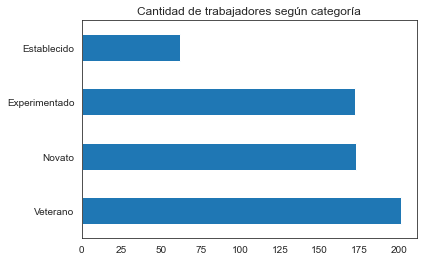

In [128]:
# Gráfico con la cantidad relativa de cada categoría
df.category.value_counts().plot(kind='barh', title='Cantidad de trabajadores según categoría')
plt.show()

**Comprobamos la columna *dissatisfied***

In [80]:
df.dissatisfied.value_counts()

False    375
True     233
Name: dissatisfied, dtype: int64

### 4.3.2. Categorización según edad

Haremos lo mismo que acabamos de hacer, pero con las edades.

In [117]:
# Visualizamos la columna 'age'
df.age.value_counts(dropna=False)

51-55            69
NaN              49
41 � 45          45
41-45            44
46 � 50          39
36-40            36
46-50            34
21 � 25          33
31 � 35          32
26 � 30          32
26-30            31
36 � 40          31
31-35            29
56 or older      28
21-25            26
56-60            22
61 or older      18
20 or younger    10
Name: age, dtype: int64

Vamos a modificar la columna *age* y la categorizaremos según la edad, de manera similar a como lo hicimos con los años de servicio:

- Menor de 30: joven
- 30-40: mediano
- 41-55: senior
- +55: mayor

In [119]:
# Creamos una función para categorizar los valores
def edades(valor):
    if valor in ['20 or younger','21 � 25', '26 � 30', '26-30', '21-25']:
        return 'Joven'
    elif valor in ['31 � 35', '36 � 40', '31-35']:
        return 'Mediano'
    elif valor in ['41 � 45', '41-45', '46 � 50', '46-50']:
        return 'Senior'
    elif pd.isnull(valor):
        return np.nan
    else:
        return 'Mayor'

df['Ages'] = df.age.apply(edades)

In [123]:
df['Ages'].value_counts(dropna=False)

Mayor      173
Senior     162
Joven      132
Mediano     92
NaN         49
Name: Ages, dtype: int64

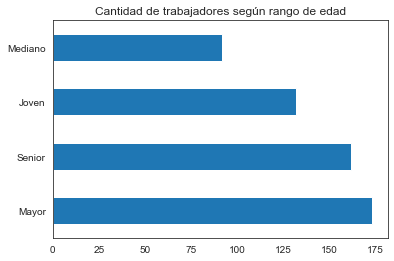

In [130]:
# Cantidad de trabajadores por edades
df['Ages'].value_counts().plot(kind='barh', title='Cantidad de trabajadores según rango de edad')
plt.show()

## 5. Resultados

Con el dataframe ya preparado, podemos realizar los análisis necesarios para responder las preguntas que nos hacíamos en la Introducción:

- ¿Tuvieron los empleados que estuvieron trabajando durante periodos cortos alguna insatisfacción que les llevase a abandonar el empleo? ¿Y los más antiguos?
- ¿Los empleados más jóvenes resignaron por alguna insatisfacción? ¿Y los más mayores?

Vamos a analizar la primera cuestión:


### 5.1. Insatisfacción en relación a la antigüedad

Lo que haremos será calcular el porcentaje de trabajadores insatisfechos en función de su categoría (hay que recordar que hemos creado una columna llamada *category* según la experiencia del trabajador).

In [134]:
# Creamos una pivot table
pv_category = df.pivot_table(values='dissatisfied', index='category', aggfunc=np.mean)
pv_category = pv_category.iloc[[2,1,0,3]]
pv_category

,dissatisfied
category,
Novato,0.265896
Experimentado,0.343023
Establecido,0.516129
Veterano,0.477612


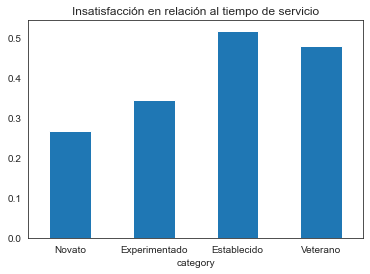

In [135]:
pv_category.plot(kind='bar',title='Insatisfacción en relación al tiempo de servicio', legend=False)
plt.xticks(rotation=0)
plt.show()

La tabla muestra el porcentaje de trabajadores insatisfechos según su experiencia en la empresa. Se puede ver que la tendencia general es que la insatisfacción aumenta en relación a los años trabajados.

El porcentaje de 'novatos' (menos de 3 años en la compañía) instatisfechos apenas llega al 27%, mientras que los 'veteranos' (más de 11 años) rozan el 48% (casi la mitad del total y casi el doble que los novatos).

Por tanto concluimos que, en general, **la insatisfacción aumenta con el tiempo de servicio**.

### 5.2. Insatisfacción en relación a la edad

De la misma manera, ya habíamos preparado una columna, que hemos llamado *ages*, donde tenemos categorizada la edad según un rango que establecimos. 

Vamos a ver los resultados:

In [136]:
# Pivot table de la columna 'ages'
pv_ages = df.pivot_table(values='dissatisfied', index='Ages', aggfunc=np.mean)
pv_ages = pv_ages.iloc[[0,2,3,1]]
pv_ages

,dissatisfied
Ages,
Joven,0.340909
Mediano,0.347826
Senior,0.395062
Mayor,0.421965


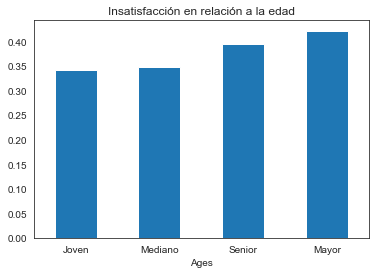

In [137]:
pv_ages.plot(kind='bar',title='Insatisfacción en relación a la edad', legend=False)
plt.xticks(rotation=0)
plt.show()

La insatisfacción es mayor cuanto mayor es la persona, pero no crece de una manera tan pronunciada como lo hacía con el tiempo de servicio.

De los empleados jóvenes y medianos que renunciaron, el 34% lo hicieron por insatisfacciones en el trabajo. De los senior, casi el 40%, mientras que el porcentaje es del 42% entre los más mayores.

Concluimos que **la insatisfacción es mayor cuanto mayor es la persona**.

### 5.3. Insatisfacción en relación a la entidad

Aunque no es parte del objetivo del análisis, aprovechando que tenemos los datos, vamos a comprobar en qué instituto los trabajadores sufrieron más insatisfacciones (DETE o TAFE).

In [138]:
# Pivot table de la columna 'institute'
pv_institute = df.pivot_table(values='dissatisfied', index='institute')
pv_institute

,dissatisfied
institute,
DETE,0.501832
TAFE,0.286567


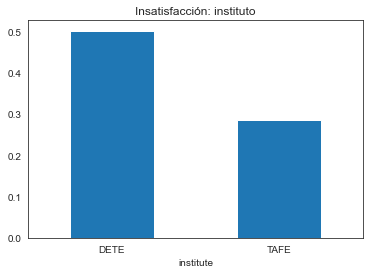

In [140]:
pv_institute.plot(kind='bar', title='Insatisfacción: instituto', legend=False)
plt.xticks(rotation=0)
plt.show()

A la vista está que **los trabajadores del DETE que renunciaron, en general, lo hicieron con más insatisfacciones que los del TAFE (50% y 28%, respectivamente)**.

## 6. Conclusiones finales

Vamos a responder a las preguntas que nos formulábamos inicialmente:

**¿Tuvieron los empleados que estuvieron trabajando durante periodos cortos alguna insatisfacción que les llevase a abandonar el empleo? ¿Y los más antiguos?**

- De los empleados que trabajaron durante periodos cortos, el 26% tuvo alguna insatisfacción.
- Entre los más antiguos, entre un 47% y un 51% tuvieron alguna insatisfacción.

**¿Los empleados más jóvenes resignaron por alguna insatisfacción? ¿Y los más mayores?**

- Entre los empleados más jóvenes, los que renunciaron debido a alguna insatisfacción fueron en torno al 34%.
- Entre los empleados más mayores, entre el 40% y el 42% tuvieron alguna insatisfacción.

La insatisfacción de los empleados de los institutos australianos DETE y TAFE aumenta con la edad, y lo hace de una forma mucho más severa en relación al tiempo trabajado en las entidades.

Los trabajadores del DETE sufrieron en general más insatisfacciones que los del TAFE. Concretamente, el 50% de los trabajadores del DETE, y el 28% de los trabajadores del TAFE.
